# Case processo seletivo - Grupo Turing
### Análise de Dados e Inteligência Artiﬁcia

Autor: Hugo Martins da Cruz

Dataset: https://www.kaggle.com/nilimajauhari/glassdoor-analyze-gender-pay-gap

### Descrição do dataset:

- **JobTitle:** cargo ocupado.
- **Gender:** gênero: feminino ou masculino.
- **Age:** idade, um número inteiro.
- **PerfEval:** avaliação de desempenho, um número de 1 a 5.
- **Education:** nível educacional, pode ser High School, College, Masters ou PhD.
- **Dept:** departamento.
- **Seniority:** senioridade, número de anos trabalhados no cargo, de 1 a 5 anos.
- **BasePay:** salário base anual em dólares.
- **Bonus:** bonus anual em dólares.


# 1. Setup

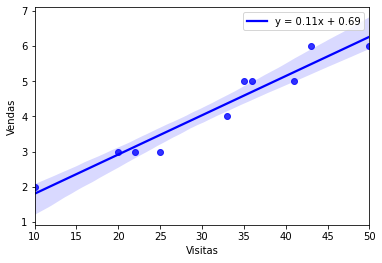

In [42]:
import pandas as pd
import seaborn as sns
from scipy import stats

df = pd.read_csv('bolos_vendidos.csv')

slope, intercept, r_value, p_value, std_err = stats.linregress(df['Visitas'],df['Vendas'])

ax = sns.regplot(x="Visitas", y="Vendas", data=df, color='b', 
 line_kws={'label':"y = {0:.2f}x + {1:.2f}".format(slope,intercept)})

ax.legend()

Algumas constantes utilizadas:

In [183]:
# cores utilizadas nos gráficos categóricos
gender_colors = {"Female":"salmon", "Male": "slateblue"}

# ordem das categorias
category_orders = {"Education":['High School', 'College','Masters','PhD'], 
                   "Dept":['Operations', 'Management', 'Administration', 'Sales', 'Engineering'],
                   "JobTitle":['Graphic Designer', 'Warehouse Associate', 'IT', 'Sales Associate', 
                               'Driver', 'Financial Analyst', 'Data Scientist', 'Marketing Associate', 
                               'Software Engineer', 'Manager'],
                   "Gender": ['Female', 'Male']
                  }

# faixa etária
age_group = [17, 23, 29, 35, 41, 47, 53, 59, 65]

Leitura do dataset:

In [170]:
glassdoor_data = pd.read_csv('glassdoor_gender_pay_gap.csv')

Observações iniciais:

In [171]:
glassdoor_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JobTitle   1000 non-null   object
 1   Gender     1000 non-null   object
 2   Age        1000 non-null   int64 
 3   PerfEval   1000 non-null   int64 
 4   Education  1000 non-null   object
 5   Dept       1000 non-null   object
 6   Seniority  1000 non-null   int64 
 7   BasePay    1000 non-null   int64 
 8   Bonus      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [178]:
glassdoor_data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000
std,14.294856,1.423959,1.395029,25337.493272,2004.377365
min,18.000000,1.000000,1.000000,34208.000000,1703.000000
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000
max,65.000000,5.000000,5.000000,179726.000000,11293.000000


Em seguida serão analizados os dados contínuos do dataset.

# 2. Dados contínuos

## 2.1. Histogramas:

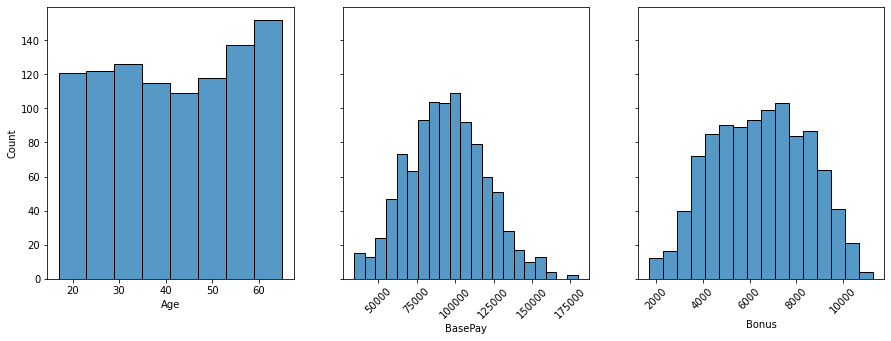

In [184]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

sns.histplot(ax=axes[0], data=glassdoor_data, x="Age", bins=age_group)

sns.histplot(ax=axes[1], data=glassdoor_data, x="BasePay")
axes[1].tick_params(labelrotation=45)

sns.histplot(ax=axes[2], data=glassdoor_data, x="Bonus")
axes[2].tick_params(labelrotation=45)

plt.show()

No **histograma de idade**, vemos que as idades que mais aparecem estão na faixa etária de **53 a 65 anos**. Os histogramas de **BasePay** e **bonus** seguem uma **distribuição aproximadamente normal**.

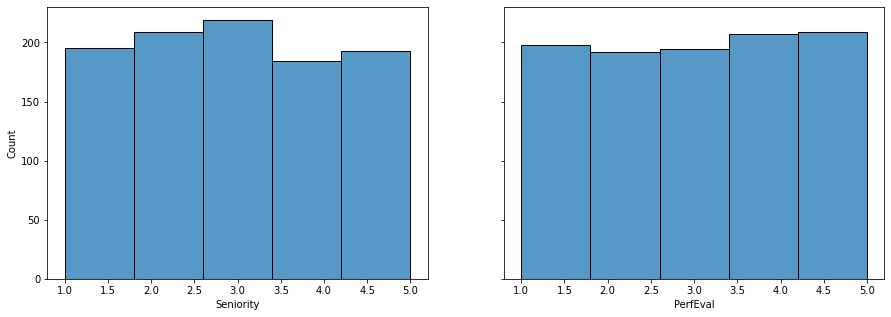

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

sns.histplot(ax=axes[0], data=glassdoor_data, x="Seniority", bins=5)

sns.histplot(ax=axes[1], data=glassdoor_data, x="PerfEval", bins=5)

plt.show()

Os histogramas de **Seniority** e **PerEval** demostram que essas características estão distribuitas **quase que uniformemente** no dataset estudado.

## 2.2. Análise de correlação:

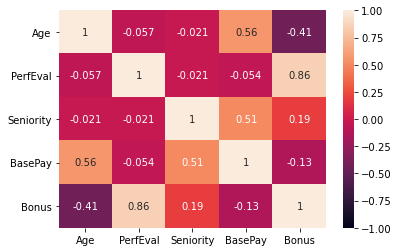

In [189]:
sns.heatmap(glassdoor_data.corr(), annot=True, vmin=-1, vmax=1)

plt.show()

Analisando o gráfico acima, podemos observar que as variáveis que possuem maior correlação são, respectivamente:

- Bonus e PerfEval
- BasePay e Age
- BasePay e Seniority

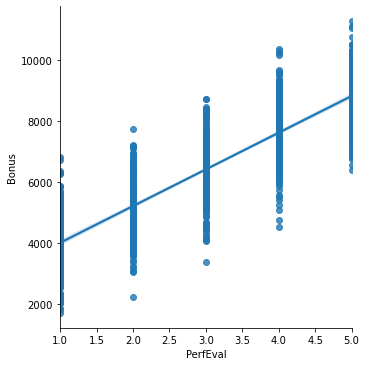

In [10]:
sns.lmplot(x='PerfEval', y='Bonus', data=glassdoor_data)

plt.show()

As variáveis **Bonus** e **PerfEval** tem a **maior correlação do dataset**, isso é de se esperar, já que normalmente o bônus salarial é calculado baseado na performance do empregado.

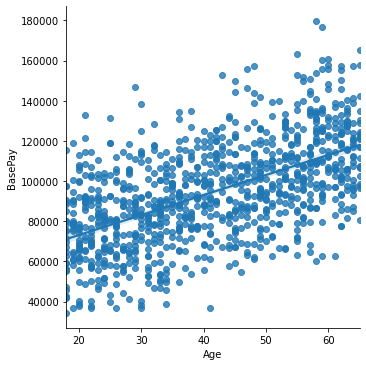

In [187]:
sns.lmplot(x='Age', y='BasePay', data=glassdoor_data)

plt.show()

**Age** e **BasePay** tem uma **correlação positiva de 0.56**.

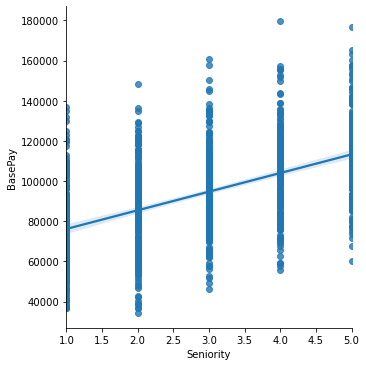

In [193]:
sns.lmplot(x='Seniority', y='BasePay', data=glassdoor_data)

plt.show()

**Seniority** e **BasePay** tem uma **correlação positiva de 0.51**, isso é também é natural, já que, normalmente, quanto maior a experiência em uma função, maior é a remuneração oferecida.

# 3. Dados categóricos

Em seguida analisaremos os dados categóricos.

## 3.1. Histogramas:

### 3.1.1. Análise geral:

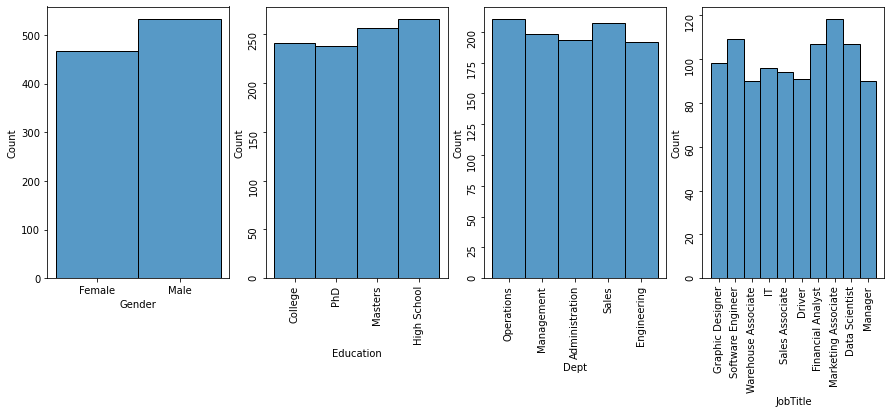

In [13]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

sns.histplot(ax=axes[0], data=glassdoor_data, x="Gender")

sns.histplot(ax=axes[1], data=glassdoor_data, x="Education")
axes[1].tick_params(labelrotation=90)

sns.histplot(ax=axes[2], data=glassdoor_data, x="Dept")
axes[2].tick_params(labelrotation=90)

sns.histplot(ax=axes[3], data=glassdoor_data, x="JobTitle")
axes[3].tick_params(labelrotation=90)

plt.show()

Nos histogramas acima, podemos observar que o número de observações das características Gender, Education, Dept e JobTitle estão distribuidos de forma quase uniforme dentro do dataset, sem grandes distorções dignas de nota.

### 3.1.2. Análise segmentada:

In [194]:
variaveis=['Dept', 'JobTitle', 'Education','Seniority', 'PerfEval']

for variavel in variaveis:
    fig=px.histogram(glassdoor_data, x=variavel, color='Gender', color_discrete_map=gender_colors, 
                     category_orders=category_orders, barmode='group', title=variavel)
    
    fig.show()

#### Insights:

- **Dept:**

Mulheres são minoria em todos os departamentos, a maior diferença está em **management** e a menor em **administration**.

- **JobTitle:**

Os cargo de **Software Engineer** e **Manager** são majoritariamente ocupados por **homens** e o cargo de **Marketing Associate** é majoritariamente ocupado por mulheres.

Como o número de observações de pessoas do sexo oposto dentro dessas profissões é muito inferior ao sexo predominante (por exemplo, para Software Engineer de 109 observações, apenas 8 são de mulheres), para evitar distorções, vamos analisá-las separadamente. 

- **Education:**

Homens são maioria nos níveis de educação mais altos como **Masters** e **PhD**.

- **Seniority:**

Homens são maioria com senioridade de 1 a 4 anos, com destaque 1 e 4, já com 5 anos de senioridade homens e mulheres são equivalente.

- **PerfEval:**

Mulheres são maioria no nível 1 de PerfEval, todos os demais níveis são ocupados majoritariamente por homens.





## 3.2. Scatters e Boxplots:

In [195]:
# cargos majoritariamente ocupados por homens.
male_job = ['Software Engineer', 'Manager']

# cargos majoritariamente ocupados por mulheres.
female_job = ['Marketing Associate']

# cargos ocupados de forma parecida por homens e mulheres.
other_job = ['Graphic Designer', 'Warehouse Associate','IT', 'Sales Associate', 
             'Driver', 'Financial Analyst', 'Data Scientist']

# dados dos cargos majoritariamente ocupados por homens.
male_data = glassdoor_data[glassdoor_data['JobTitle'].isin(male_job)]

# dados dos cargos majoritariamente ocupados por mulheres.
female_data = glassdoor_data[glassdoor_data['JobTitle'].isin(female_job)]

# datos dos cargos ocupados de forma parecida por homens e mulheres.
other_data = glassdoor_data[glassdoor_data['JobTitle'].isin(other_job)]

### 3.2.1. BasePay e Seniority:

In [196]:
px.scatter(glassdoor_data, x="Seniority", y="BasePay",trendline="ols" ,color="Gender", 
           facet_col="Education", category_orders=education_order,
           color_discrete_map=gender_colors)



In [197]:
px.box(glassdoor_data,x="Dept",y="BasePay",color='Gender',color_discrete_map=gender_colors, category_orders=category_orders)

In [198]:
px.box(glassdoor_data,x="Seniority",y="BasePay",color='Gender',color_discrete_map=gender_colors, category_orders=category_orders)

Nos gráficos acima foi utilizado o dataset completo, antes da separação das profissões que são marjoritariamente ocupadas por um gênero, neles podemos observar que as **mulheres em média tem salário inferior aos homens em todos os níveis de senioridade e em todos os departamentos**.

In [88]:
px.scatter(other_data, x="Seniority", y="BasePay",trendline="ols" ,color="Gender", 
           facet_col="Dept", category_orders=category_orders,
           color_discrete_map=gender_colors)

In [199]:
px.box(other_data,x="Dept",y="BasePay",color='Gender',color_discrete_map=gender_colors, category_orders=category_orders)

In [200]:
px.box(other_data,x="Seniority",y="BasePay",color='Gender',color_discrete_map=gender_colors, category_orders=category_orders)

No gráfico acima foram **retirados os cargos de Software Engineer, Manager e Marketing Associate**. Vemos que a disparidade de salários diminuiu bastante, o que sugere que tais cargos tem grande influência nessa disparidade, vamos analizar isso na próxima seção.

Os destaques são:

- a mediana de salários no departamento de **engenharia** é **maior** para **homens**
- a mediana de salários no departamento de **vendas** é **maior** para **mulheres**
- a mediana de salários é **maior** para **mulheres** com **senioridade de 5 anos**

### 3.2.2. Salário por JobTitle:

In [206]:
depts=['Operations', 'Management', 'Administration', 'Sales', 'Engineering']

for dept in depts:
    fig=px.box(glassdoor_data[glassdoor_data['Dept'] == dept], x='JobTitle', y="BasePay",
               color='Gender', color_discrete_map=gender_colors, 
               category_orders=category_orders, title=dept)
    
    fig.show()

Nos gráficos acima observamos que os **maiores salários** estão nos cargos de **Manager** e **Software Engineer**, **justamente os cargos que são marjoritariamente ocupados por homens**, além disso o cargo de **Marketing Associate**, que é marjoritariamente ocupado por **mulheres**, possue um dos **menores salários** em todos os departamentos. Isso explica o porquê de, na seção anterior, a disparidade de salários ter reduzido bastante quando esses cargos foram removidos da análise.

### 3.2.3. BasePay e Education:

In [203]:
px.box(glassdoor_data,x="Education",y="BasePay",color='Gender',color_discrete_map=gender_colors, category_orders=education_order)

In [209]:
education_levels=['High School', 'College','Masters','PhD']

for edu in education_levels:
    fig=px.box(glassdoor_data[glassdoor_data['Education'] == edu], x='Dept', y="BasePay",
               color='Gender', color_discrete_map=gender_colors, 
               category_orders=category_orders, title=edu)
    
    fig.show()

Nos gráficos acima podemos ver que as **mulheres tem salários inferiores aos dos homens em todos os níveis de educação** na grande maioria dos departamentos.

# Conclusões:



Podemos observar, pela análise feita na seção 3.2.2, que as mulheres são minoria nos cargos de Manager e Software Engineer, cargos que possuem os maiores salários, ao mesmo tempo o cargo de Marketing Associate, que é ocupado marjoritariamente por mulheres possui o menor salário, esses são alguns dos fatores que contribuem para a disparidade de salários entre homens e mulheres, mas não são os único.

O departamento de engenharia é o que possui maior disparidade salarial. Mesmo após remover os cargos marjoritariamente ocupados por homens, as mulheres ainda recebem menos em média nesse departamento. O único departamento que vemos a tendencia inversa é o de vendas onde mulheres possuem os maiores salários.

Por último, pela análise da seção 3.2.3, observamos que as mulheres recebem menos mesmo estando no mesmo nível de educação dos homens na maioria dos departamento, a maior diferença está no mestrado no departamento de engenharia.